In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_excel(r'C:\Users\Sanjeet Kumar\Desktop\PythonProject\student_info.xlsx')

In [4]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
df.shape

(200, 2)

In [8]:
# discover and visualize the data to gain insights

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


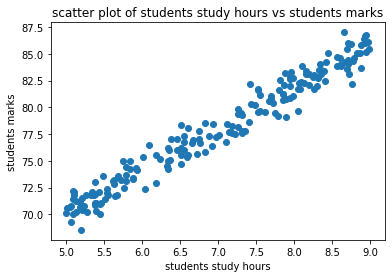

In [11]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("students study hours")
plt.ylabel("students marks")
plt.title("scatter plot of students study hours vs students marks")
plt.show()

In [12]:
#prepare the data for machine lerning algorithms

In [13]:
# data cleaning

In [14]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [16]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [17]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [18]:
df2 = df.fillna(df.mean())

In [19]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [20]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [22]:
# split data set

In [45]:
X = df2.drop("student_marks",axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ",X.shape)
print("shape of y = ",y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ",X_train.shape)
print("shape of y_train = ",y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [47]:
#sellect a model and train it
# y= mx +c

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lr.coef_

array([[3.93571802]])

In [54]:
lr.intercept_

array([50.44735504])

In [55]:
m = 3.93
c = 50.44
y = m*4 +c
y

66.16

In [56]:
lr.predict([[4]])

array([[66.1902271]])

In [58]:
#if we needs only  value     round gives value upto decimal

In [59]:
lr.predict([[4]])[0][0].round(2)

66.19

In [60]:
# for ml model testing

In [61]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [67]:
# to get data frame

In [68]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [69]:
# to get actual value of ml model or to test accuracy we use fine tune methods

In [70]:
# fine tune your model

In [71]:
lr.score(X_test,y_test)

0.9514124242154464

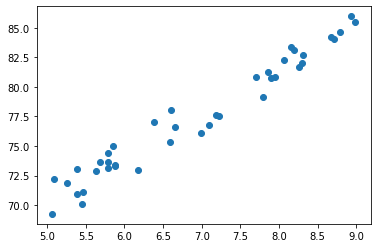

In [72]:
plt.scatter(X_test, y_test)


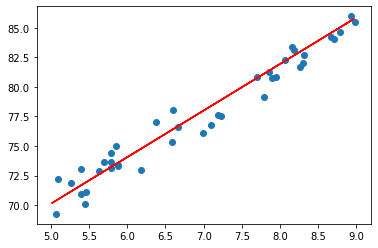

In [74]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [75]:
# present your soluttion

In [76]:
# save ml model

In [80]:
import joblib
joblib.dump(lr, "students_mark_predictor_model.pkl")

['students_mark_predictor_model.pkl']

In [81]:
model = joblib.load("students_mark_predictor_model.pkl")

In [82]:
model.predict([[5]])[0][0]

70.12594512018406